# EECS 469/569: Homework 2 Submission
## Single Node Multi-Threaded Performance of Roaring Thunder
### Due: Tuesday, Oct. 4 *before* midnight

[Sign-up for a grading period here.](https://doodle.com/meeting/participate/id/epQo0Dra)

## Name 1: Chen-Wei Hung
## Name 2: Matt Dentlinger

## Checklist

0. [Other Deliverables](#Other-Deliverables)
    0. Sign up for grading slot
    1. Email team to Dr. Hansen
    2. Write a couple of paragraphs on main takeaways and how you worked together
1. [OpenMP Overhead](#2.-OpenMP-Overhead)
    1. paper summary
    2. directive overhead
    3. scheduler overhead
2. [OpenMP Linear Algebra](#3.-OpenMP-Linear-Algebra)
    1. naive versus tiled parallel speedup
    2. parallel for versus tasks speedup
    3. matrix-vector and dot-product speedup
3. [Non-Linear Algebra](#4.-Non-Linear-Algebra)
    1. description of your solved problem and how you solved it, discussion of another group

### Submission Instructions

Follow all instructions within `hw02.ipynb`. To submit the homework assignment, put **only relevant files (including this notebook)** in a folder. Zip the folder (e.g., using [7-zip](https://www.7-zip.org/)) and send one email to Dr. Hansen (CC your partner) with the zipped folder. **Do not include the benchmark files, they are not relevant.** Print a .pdf of this (completed) Jupyter notebook and submit it to D2L before the deadline (`CTRL+P` $\rightarrow$ `Save as PDF` in Google Chrome). 

It is your responsibility that all of the figures, plots, source code, etc. properly appear in the submitted notebook **and .pdf**. Homework 1 was graded leniently, this homework will check to see improvements.  

## Other Deliverables

$\mathbf{\infty}$**.1** **FIRST DELIVERABLE (-5 points if not done):** ***By class on Monday, Sep. 19,*** email Dr. Hansen (CC your partner) who you will be working with for this homework. 

$\mathbf{\infty}$**.2** **FINAL DELIVERABLE (3 points):** ***After*** you have completed the entire assignment, write a few paragraphs on your main takeaways from the assignment. **Clearly state** how the work was split up between you and your partner. 

## 2. OpenMP Overhead

### Required SLURM Batch Submissions:
* submit the provided `.slurm` file in the syncbench folder

**Datasets:** link your code and datasets here with a couple word description of each:
* [matrix_multiply_parallel_naive.c](matrix_multiply_serial_naive.c)
* [matrix_multiply_parallel_naive.csv](matrix_multiply_serial_naive.csv)
* [matrix_multiply_parallel_tiled.c](matrix_multiply_serial_tiled.c)
* [matrix_multiply_parallel_tiled.csv](matrix_multiply_serial_tiled.csv)
* [matrix_multiply_omp_tasks.c](matrix_multiply_omp_tasks.c)
* [matrix_multiply_omp_task.csv](matrix_multiply_omp_task_new.csv)
* [schedbench.csv](schedbench1.csv)
* [syncbench.csv](syncbench1.csv)

**2.1 DELIVERABLE (3 points):** Write a one paragraph summary of the paper. 

This paper benchmarked the overhead of synchronisation and loop schedulaing for openmp. The test results are presented with different CPUs. The overhead difference between each method and CPUs are significant. 

**2.2 DELIVERABLE (10 points):** For syncbench: create a table with the average overhead time, and discuss the overhead of the following OpenMP directives: parallel, for, parallel for, barrier, critical, atomic. 

Create a box-whiskers that compares the time distribution between critical, lock/unlock, and atomic. Discuss.

| parallel | for | parallel for | barrier | critical | atomic |
|----------|-----|--------------|---------|----------|--------|
|9.028949|2.389055|6.424982|2.405868|0.336532|0.054855|


**discussion:**
The plain parallel has the most overhead due do its lack of optimization like for or parallel for. And the reason why parallel for has more overhead than just for is because parallel for needs to go through the parallel initialization. The atomic has the least overhead because its only accessing to one memory address. For critical, it has more overhead because its making private copies for each thread. On paper, barrier has the least overhead, because its simply putting a breakpoint on each thread.

Text(0.5, 1.0, 'Average Overhead for different OpenMP Calls')

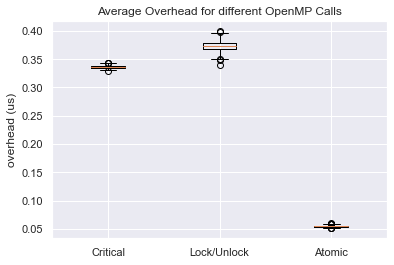

In [5]:
# plot the box-whiskers plot here

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

#get random number generator from numpy
rng = np.random.default_rng()

#create a dataframe
dataFrame = pd.read_csv("syncbench1.csv")

critical_avg = dataFrame[" overhead avg (us)"].tolist()[5:6]
critical_stdev = dataFrame[" overhead stdev (us)"].tolist()[5:6]
lock_avg = dataFrame[" overhead avg (us)"].tolist()[6:7]
lock_stdev = dataFrame[" overhead stdev (us)"].tolist()[6:7]
atomic_avg = dataFrame[" overhead avg (us)"].tolist()[8:9]
atomic_stdev = dataFrame[" overhead stdev (us)"].tolist()[8:9]


y1 = rng.normal(critical_avg,critical_stdev,size=1000)
y2 = rng.normal(lock_avg,lock_stdev,size=1000)
y3 = rng.normal(atomic_avg,atomic_stdev,size=1000)

names = ['Critical','Lock/Unlock','Atomic']

plt.boxplot([y1,y2,y3],labels=names)
plt.ylabel('overhead (us)')
plt.title("Average Overhead for different OpenMP Calls")


**Discussion:**

The atomic has the least overhead is because it is managing only one memory cell; for lock/unlock and critical, they are making private copies of memory for each lock/unlock and critical sessions, which will lead to much more overhead.

Text(0.5, 1.0, 'Average Overhead vs chunk size')

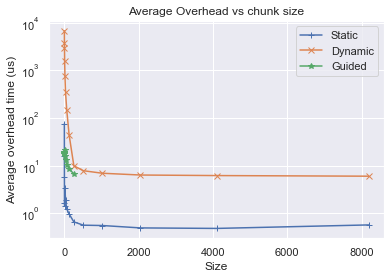

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame = pd.read_csv("schedbench1.csv")
#print(dataFrame)
size_static = dataFrame[" size"].tolist()[0:15]
oa_static = dataFrame[" overhead avg (us)"].tolist()[0:15]
size_dynamic = dataFrame[" size"].tolist()[15:29]
oa_dynamic = dataFrame[" overhead avg (us)"].tolist()[15:29]
size_guided = dataFrame[" size"].tolist()[29:38]
oa_guided = dataFrame[" overhead avg (us)"].tolist()[29:38]

#plot averages
plt.plot(size_static,oa_static, marker='+', label = "Static")
plt.plot(size_dynamic,oa_dynamic, marker='x', label = "Dynamic")
plt.plot(size_guided,oa_guided, marker='*', label = "Guided")
plt.xlabel('Size')
plt.ylabel('Average overhead time (us)')
plt.yscale("log")
plt.legend()
plt.title("Average Overhead vs chunk size")

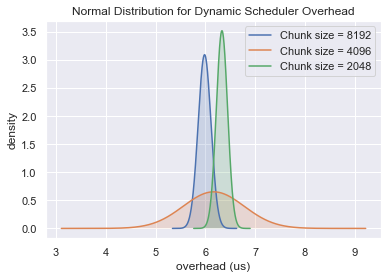

In [7]:
# create a normal distribution plot here for dynamic scheduler overhead. Choose at least 3 chunk sizes that make a nice plot.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
%matplotlib inline

#plot using the exact normal distribution formula
mean8192 = 5.982801
std8192 = 0.128907

mean4096 = 6.165687
std4096 = 0.611898

mean2048 = 6.331882
std2048 = 0.113284

xmin8192 = mean8192 - 5*std8192
xmax8192 = mean8192 + 5*std8192
step8192 = (xmax8192 - xmin8192) / 1000

xmin4096 = mean4096 - 5*std4096
xmax4096 = mean4096 + 5*std4096
step4096 = (xmax4096 - xmin4096) / 1000

xmin2048 = mean2048 - 5*std2048
xmax2048 = mean2048 + 5*std2048
step2048 = (xmax2048 - xmin2048) / 1000

X8192 = np.arange(xmin8192,xmax8192,step8192)
X4096 = np.arange(xmin4096,xmax4096,step4096)
X2048 = np.arange(xmin2048,xmax2048,step2048)

plt.plot(X8192,norm.pdf(X8192,mean8192,std8192), label = "Chunk size = 8192")
plt.plot(X4096,norm.pdf(X4096,mean4096,std4096), label = "Chunk size = 4096")
plt.plot(X2048,norm.pdf(X2048,mean2048,std2048), label = "Chunk size = 2048")
ax = plt.gca() #get current axes
ax.fill(X8192,norm.pdf(X8192,mean8192,std8192),alpha=0.2)
ax.fill(X4096,norm.pdf(X4096,mean4096,std4096),alpha=0.2)
ax.fill(X2048,norm.pdf(X2048,mean2048,std2048),alpha=0.2)

ax.set_xlabel('overhead (us)')
ax.set_ylabel('density')
plt.legend()
plt.title("Normal Distribution for Dynamic Scheduler Overhead")

plt.show()

**Discussion**

Comparing between schedulers, static scheduler has the lowest overhead time. The guided scheduler's overead is in the middle and the dynamic scheduler has the greatest overhead. Static has the least overhead because it equally distibutes the loop iterations to the threads before the program runs.  Dynamic and guided have more overhead because it initially assigns iterations to threads, but when they are done they go back and ask for new jobs. Static would fit better for the task the has evenly distributed iterations, becuase one threads need to wait for all other threads to finish to get the next job; for dynamic, it would fit better for unevenly distributed iteration, because one a thread is done and ready for the next task, it can start the next task immediatetly. For guided, it can be used in scenario similar to dynamic scheduling, its difference is that it decreases chunk sizes as the program runs.  

## 3. OpenMP Linear Algebra
### Required SLURM Batch Submissions:
* OpenMP naive matrix-matrix product (5 each): T = 2, 4, 8, 16, 32
    * 20 times for T = 32
* OpenMP tiled matrix-matrix product (5 each): T = 2, 4, 8, 16, 32
    * 20 times for T = 32
* OpenMP tasked tiled matrix-matrix product (20 times): T = 32
* OpenMP dot product (5 each): T = 1, 2, 4, 8, 16, 32
    * 20 times for T = 32
* OpenMP matrix-vector product (5 each): T = 1, 2, 4, 8, 16, 32
    * 20 times for T = 32

**3.1 DELIVERABLE (25 points):** 

Create four figures that have $T$ on the x-axis (including $T=1$), and on the y-axis:
1. average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
2. average floating point operations per second (FLOPs)
3. average execution time
4. average parallel efficiency (plot a line showing perfect parallel efficiency)

Each figure should have two plots: one for the naive method and one for the tiled method. The two plots should have distinct colors and lines (e.g., solid verus dashed). Add a legend that clearly identifies which plot is which. 

***USE AN APPROPRIATE SI PREFIX FOR YOUR Y-AXES (e.g., GFlops)!*** Discuss in one paragraph per figure the impact of OpenMP and the number of threads on algorithm performance. ***WHY*** do you think you are seeing the results you are? Not just **WHAT**.

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [matrix_multiply_parallel_naive.c](matrix_multiply_serial_naive.c)
* [matrix_multiply_parallel_naive.csv](matrix_multiply_serial_naive.csv)
* [matrix_multiply_parallel_tiled.c](matrix_multiply_serial_tiled.c)
* [matrix_multiply_parallel_tiled.csv](matrix_multiply_serial_tiled.csv)


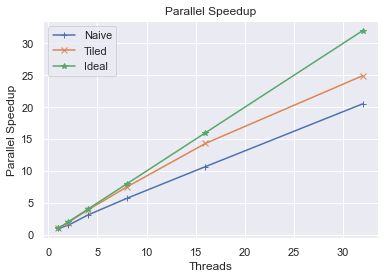

In [8]:
# plot number of threads versus parallel speedup for naive/tiled

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_naive = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_tiled = pd.read_csv("matrix_multiply_serial_tiled.csv")

#group the data by N
groups = dataFrame_naive.groupby('T',as_index=False)['s']
groups_tiled = dataFrame_tiled.groupby('T',as_index=False)['s']

#average each group
averages = groups.mean()
averages_tiled = groups_tiled.mean()
#print(averages)

sequential_time = np.array(averages["s"].tolist()[0:1])
parallel_times = np.array(averages["s"].tolist()[0:6])
sequential_time_tiled = np.array(averages_tiled["s"].tolist()[0:1])
parallel_times_tiled = np.array(averages_tiled["s"].tolist()[0:6])

parallel_speedup = sequential_time/parallel_times
parallel_speedup_tiled = sequential_time_tiled/parallel_times_tiled
threads = [1, 2, 4, 8, 16, 32]

#plot
plt.plot(threads,parallel_speedup, marker='+', label = "Naive")
plt.plot(threads,parallel_speedup_tiled, marker='x', label = "Tiled")
plt.plot(threads,threads, marker='*', label = "Ideal")
plt.xlabel('Threads')
plt.ylabel('Parallel Speedup')
plt.legend()
plt.title("Parallel Speedup")
plt.show()

**Discussion**:
It is difficult for parallel speedup to reach Ideal value because of overhead. Implementing parallelism is not free, and the cost is the time for overhead. We noticed that tiled method is faster than naive, it is because tile is a technique to speed up matrix multiplication. So compare to naive multiplication, it makes sense that parallel tiled mat. mul. is still faster than naive mat. mul.

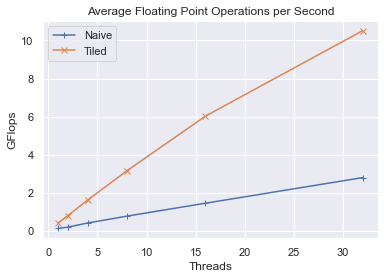

In [9]:
# plot number of threads versus FLOPs for naive/tiled

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframes
dataFrame_naive = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_tiled = pd.read_csv("matrix_multiply_serial_tiled.csv")

#group the data by N
groups = dataFrame_naive.groupby('T',as_index=False)['Flops']
groups_tiled = dataFrame_tiled.groupby('T',as_index=False)['Flops']

#average each group
averages = groups.mean()
averages_tiled = groups_tiled.mean()

Flops_naive = np.array(averages["Flops"].tolist()[0:6])/1000000000
Flops_tiled = np.array(averages_tiled["Flops"].tolist()[0:6])/1000000000
threads = [1, 2, 4, 8, 16, 32]

#plot
plt.plot(threads,Flops_naive, marker='+', label = "Naive")
plt.plot(threads,Flops_tiled, marker='x', label = "Tiled")
plt.xlabel('Threads')
plt.ylabel('GFlops')
plt.legend()
plt.title("Average Floating Point Operations per Second")
plt.show()

**discussion**:
Tiled's Flops grows faster naive as the threads increases. The reason is that with tiled optimization, the CPU can have faster access to the memory cells of the matrix to execute the operation. 

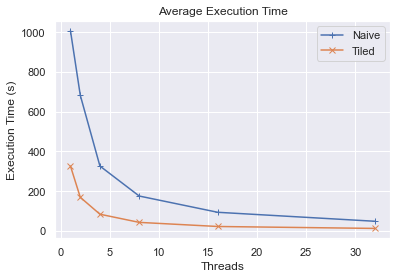

In [10]:
# plot number of threads versus execution time for naive/tiled

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_naive = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_tiled = pd.read_csv("matrix_multiply_serial_tiled.csv")

#group the data by N
groups = dataFrame_naive.groupby('T',as_index=False)['s']
groups_tiled = dataFrame_tiled.groupby('T',as_index=False)['s']

#average each group
averages = groups.mean()
averages_tiled = groups_tiled.mean()
#print(averages)

parallel_times = np.array(averages["s"].tolist()[0:6])
parallel_times_tiled = np.array(averages_tiled["s"].tolist()[0:6])

threads = [1, 2, 4, 8, 16, 32]

#plot
plt.plot(threads,parallel_times, marker='+', label = "Naive")
plt.plot(threads,parallel_times_tiled, marker='x', label = "Tiled")
plt.xlabel('Threads')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.title("Average Execution Time")
plt.show()

**dicussion**:
The time needed is consistantly lower for tiled method, because tiled is a technique to make matrix multiplication faster. We also noticed that after thread 16, the execution time decreases much slower. We think it is because after thread 16, there is no enough FLOP for openMP to push to speed up, so there is no room for execution time improvement. That is,  if we increase the matrix size, the execution time would decrease fast again after thread 16.

[ 1.          1.47533352  3.081861    5.72287773 10.69242789 20.52789782]
[1.         0.73766676 0.77046525 0.71535972 0.66827674 0.64149681]


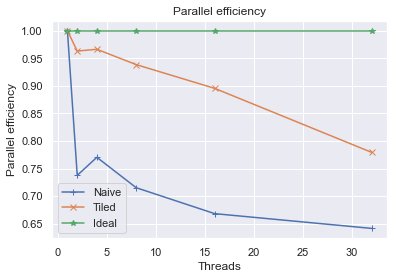

In [11]:
# plot number of threads versus parallel efficiency for naive/tiled

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_naive = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_tiled = pd.read_csv("matrix_multiply_serial_tiled.csv")

#group the data by N
groups = dataFrame_naive.groupby('T',as_index=False)['s']
groups_tiled = dataFrame_tiled.groupby('T',as_index=False)['s']

#average each group
averages = groups.mean()
averages_tiled = groups_tiled.mean()
#print(averages)

sequential_time = np.array(averages["s"].tolist()[0:1])
parallel_times = np.array(averages["s"].tolist()[0:6])
sequential_time_tiled = np.array(averages_tiled["s"].tolist()[0:1])
parallel_times_tiled = np.array(averages_tiled["s"].tolist()[0:6])

parallel_speedup_naive = sequential_time/parallel_times
parallel_speedup_tiled = sequential_time_tiled/parallel_times_tiled
threads = [1, 2, 4, 8, 16, 32]
ideal = [1,1,1,1,1,1]

parallel_efficiency_naive = parallel_speedup_naive/threads
parallel_efficiency_tiled = parallel_speedup_tiled/threads

print(parallel_speedup_naive)
print(parallel_efficiency_naive)

#plot
plt.plot(threads,parallel_efficiency_naive, marker='+', label = "Naive")
plt.plot(threads,parallel_efficiency_tiled, marker='x', label = "Tiled")
plt.plot(threads,ideal, marker='*', label = "Ideal")
plt.xlabel('Threads')
plt.ylabel('Parallel efficiency')
plt.legend()
plt.title("Parallel efficiency")
plt.show()

**discussion:**
Interestingly, as we add more threads, the efficiency went down. This happens is because as we add more threads, the treads are used more poorly. This happens because as more threads are added to the process, the parallel portion of the code decreases in time but the the overhead and sequential portions of the code remain the same. Therefore, the sequential and overhead time represents a larger portion of the total time, decreasing both the parallel speedup and parallel efficiency.

#### 3.2 DELIVERABLE (14 points):
Create a box and whiskers plot that compares the FLOPs performance of the tasking based parallelism versus the for-loop based parallelism. Write one paragraph that discusses the results. 

**Code and datasets:** link all of your code and datasets here with a couple word description of each:

* [matrix_multiply_omp_tasks.c](matrix_multiply_omp_tasks.c)
* [matrix_multiply_omp_task.csv](matrix_multiply_omp_task_new.csv)


Text(0.5, 1.0, 'GFlops Comparison between Tasks and for-loop based parallelism')

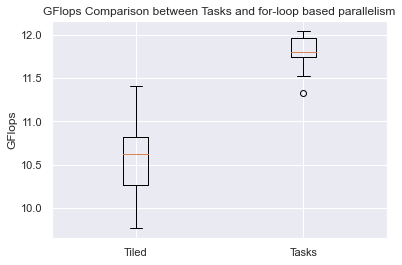

In [12]:
# plot box-whiskers comparing FLOPs of tasks versus loops 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

#create a dataframes
dataFrame_tiled = pd.read_csv("matrix_multiply_serial_tiled.csv")
dataFrame_tasks = pd.read_csv("matrix_multiply_omp_task_new.csv")

flops_tiled = np.array(dataFrame_tiled["Flops"].tolist()[25:44])/1000000000
flops_tasks = np.array(dataFrame_tasks["Flops"].tolist()[0:19])/1000000000


names = ['Tiled', 'Tasks']
plt.boxplot([flops_tiled,flops_tasks],labels=names)
plt.ylabel('GFlops')
plt.title("GFlops Comparison between Tasks and for-loop based parallelism")

**discussion:**
The tasks parallel tile has more Flops than naive parallel tile, it is because tasks breaks the program to smaller chunks, and those smaller chunks can keep different thread occupied and busy with their own flops. In parallel for, it does not have the smaller chunks, so during the program execution, some threads are left with no jobs or flops, that is why parallel for has lower flops. 

**3.3 DELIVERABLE (15 points):** 

Create two figures that have $T$ on the x-axis (including $T=1$), and on the y-axis:
1. average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
2. average floating point operations per second (FLOPs)

Each figure should have two plots: one for the dot product and one for the matrix-vector product. The two plots should have distinct colors and lines (e.g., solid verus dashed). Add a legend that clearly identifies which plot is which. 

Create a box-whiskers plot that shows the FLOPs performance compared between the matrix-matrix product (all three versions), matrix-vector product, and dot-product. Discuss the results.

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [dot_product_serial.c](dot_product_serial.c)
* [dot_product_serial.csv](dot_product_serial.csv)
* [matrix_vector_serial.c](matrix_vector_serial.c)
* [matrix_vector_serial.csv](matrix_vector_serial.csv)

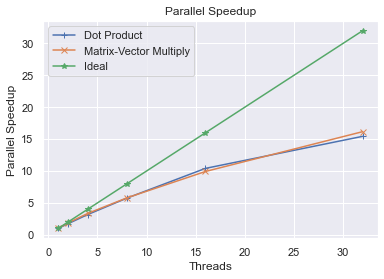

In [16]:
# plot T versus parallel speedup here for dot product and matrix vector product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_dot = pd.read_csv("dot_product_serial.csv")
dataFrame_vector = pd.read_csv("matrix_vector_serial.csv")

#group the data by N
groups_dot = dataFrame_dot.groupby('T',as_index=False)['s']
groups_vector = dataFrame_vector.groupby('T',as_index=False)['s']

#average each group
averages_dot = groups_dot.mean()
averages_vector = groups_vector.mean()
#print(averages_dot)

sequential_time_dot = np.array(averages_dot["s"].tolist()[0:1])
parrallel_times_dot = np.array(averages_dot["s"].tolist()[0:6])
seqential_time_vector = np.array(averages_vector["s"].tolist()[0:1])
parrallel_times_vector = np.array(averages_vector["s"].tolist()[0:6])

parallel_speedup_dot = sequential_time_dot/parrallel_times_dot
parallel_speedup_vector = seqential_time_vector/parrallel_times_vector
threads = [1, 2, 4, 8, 16, 32]

#plot
plt.plot(threads,parallel_speedup_dot, marker='+', label = "Dot Product")
plt.plot(threads,parallel_speedup_vector, marker='x', label = "Matrix-Vector Multiply")
plt.plot(threads,threads, marker='*', label = "Ideal")
plt.xlabel('Threads')
plt.ylabel('Parallel Speedup')
plt.legend()
plt.title("Parallel Speedup")
plt.show()

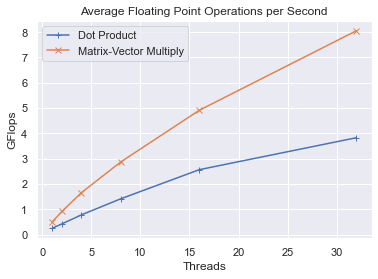

In [14]:
# plot T versus FLOPs here for dot product and matrix vector product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframes
dataFrame_dot = pd.read_csv("dot_product_serial.csv")
dateFrame_vector = pd.read_csv("matrix_vector_serial.csv")

#group the data by N
groups_dot = dataFrame_dot.groupby('T',as_index=False)['Flops']
groups_vector = dateFrame_vector.groupby('T',as_index=False)['Flops']

#average each group
averages_dot = groups_dot.mean()
averages_vector = groups_vector.mean()

Flops_dot = np.array(averages_dot["Flops"].tolist()[0:6])/1000000000
Flops_vector = np.array(averages_vector["Flops"].tolist()[0:6])/1000000000
threads = [1, 2, 4, 8, 16, 32]

#plot
plt.plot(threads,Flops_dot, marker='+', label = "Dot Product")
plt.plot(threads,Flops_vector, marker='x', label = "Matrix-Vector Multiply")
plt.xlabel('Threads')
plt.ylabel('GFlops')
plt.legend()
plt.title("Average Floating Point Operations per Second")
plt.show()

Text(0.5, 1.0, 'GFlops for all algorithms')

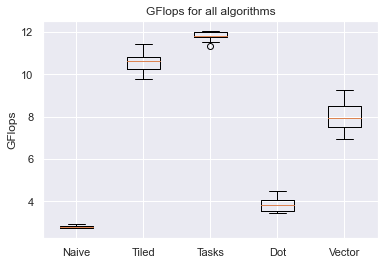

In [17]:
# plot a box-whiskers that compares the FLOPs of all five algorithm implementations

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

#create a dataframes
dataFrame_naive = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_tiled = pd.read_csv("matrix_multiply_serial_tiled.csv")
dataFrame_tasks = pd.read_csv("matrix_multiply_omp_task_new.csv")
dataFrame_dot = pd.read_csv("dot_product_serial.csv")
dateFrame_vector = pd.read_csv("matrix_vector_serial.csv")

flops_naive = np.array(dataFrame_naive["Flops"].tolist()[25:44])/1000000000
flops_tiled = np.array(dataFrame_tiled["Flops"].tolist()[25:44])/1000000000
flops_tasks = np.array(dataFrame_tasks["Flops"].tolist()[0:19])/1000000000
flops_dot = np.array(dataFrame_dot["Flops"].tolist()[25:44])/1000000000
flops_vector = np.array(dataFrame_vector["Flops"].tolist()[25:44])/1000000000

names = ['Naive','Tiled','Tasks','Dot','Vector']
plt.boxplot([flops_naive,flops_tiled,flops_tasks,flops_dot,flops_vector],labels=names)
plt.ylabel('GFlops')
plt.title("GFlops for all algorithms") 

**discussion:**
The speed up are similar for the dot product and matrix-vector multiplication. And they are both half way to the ideal thread speed up due to the cost of making them parallel (overhead). The flops are lower for dot product is because dot product is not as computatinoally intensive as matrix-vector.

For flops for everyone graph, the tasks has the highest flops is because it optimize the thread workload, making sure different threads are busy all the time. On the other hand, the naive method has the lowest flops due to its poor memory allocation, creating lots of overhead for CPU trying to accress to its memory cells. the reason why dot and vector are in the middle is because they are not as resource demanding.  

## 4. Non-Linear-Algebra
### Required SLURM Batch Submissions:
* solve your chosen problem for $T=1$ and $T=32$

**Code and datasets:** link all of your code and datasets here with a couple word description of each:
* [example link](matrix_multiply_serial_naive.c)
* 

**4.1 DELIVERABLE (20 points):** Describe what problem you chose and how you accelerated it using OpenMP. Prove that the parallel version is thread safe (same answer as non-threaded) and show the parallel speedup. 

Discuss your problem with another group and describe their problem in a few sentences, and which group (by name of team members). 